# Machine Learning

In [64]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv("/Users/rahulmeena/GitHub/incognito-r/Data-Science/Datasets/Income Dataset/income.csv")
df.head()

,age,education_level,marital_status,job_type,work_experience,hours_per_week,income,high_income
0,39,High School,Married,Healthcare,24.0,46,93.50,1
1,33,High School,Single,Management,13.0,33,96.19,1
2,41,Bachelor,Single,White Collar,15.0,28,68.83,0
3,50,Bachelor,Divorced,Healthcare,35.0,31,145.45,1
4,32,High School,Single,Management,15.0,39,68.34,0


# EDA

### Basic Structure

In [66]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1000 non-null   int64  
 1   education_level  950 non-null    object 
 2   marital_status   1000 non-null   object 
 3   job_type         950 non-null    object 
 4   work_experience  950 non-null    float64
 5   hours_per_week   1000 non-null   int64  
 6   income           1000 non-null   float64
 7   high_income      1000 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [67]:
# Summary statistics for numeric columns
df.describe()

,age,work_experience,hours_per_week,income,high_income
count,1000.000000,950.000000,1000.000000,1000.000000,1000.000000
mean,34.812000,16.502105,39.531000,90.217570,0.588000
std,9.462991,10.378379,8.061267,32.131716,0.492441
min,18.000000,0.000000,5.000000,-2.580000,0.000000
25%,28.000000,9.000000,35.000000,67.242500,0.000000
50%,35.000000,16.000000,39.000000,90.910000,1.000000
75%,41.000000,23.000000,44.000000,111.835000,1.000000
max,65.000000,45.000000,90.000000,200.000000,1.000000


In [68]:
# Check for missing values
df.isnull().sum()

age                 0
education_level    50
marital_status      0
job_type           50
work_experience    50
hours_per_week      0
income              0
high_income         0
dtype: int64

In [69]:
# drop missing values
# df.dropna(inplace=True)

In [70]:
# missing value treatment
df['work_experience'] = df['work_experience'].fillna(df['work_experience'].median())
df['education_level'] = df['education_level'].fillna(df['education_level'].mode()[0])
df['job_type'] = df['job_type'].fillna('Unknown')


### Univariate Analysis

Text(0.5, 1.0, 'Income Distribution')

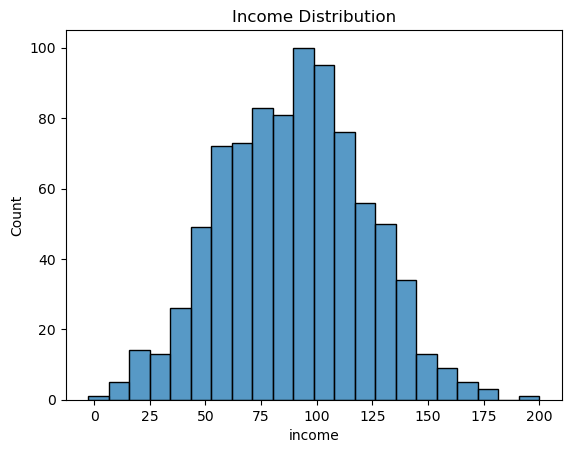

In [36]:
# histogram of Income
sns.histplot(data=df, x='income')
plt.title("Income Distribution")

<Axes: xlabel='age'>

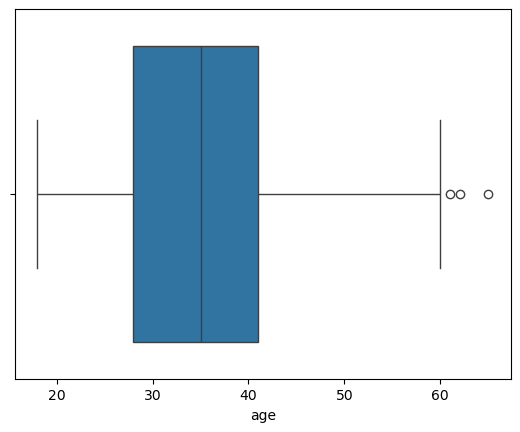

In [37]:
# Boxplot of Age
sns.boxplot(data=df, x='age')


<Axes: xlabel='education_level', ylabel='count'>

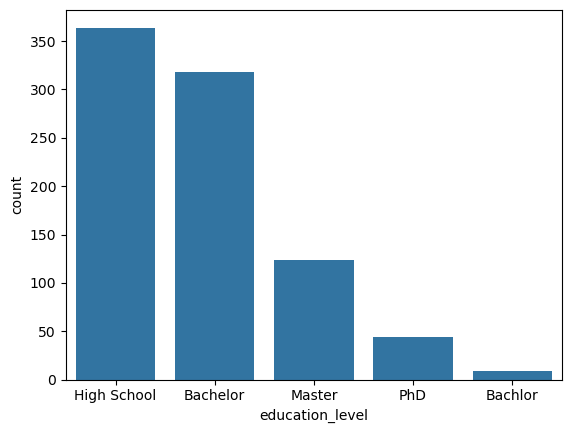

In [38]:
# countplot for education level
sns.countplot(data=df, x='education_level')

<Axes: xlabel='marital_status', ylabel='count'>

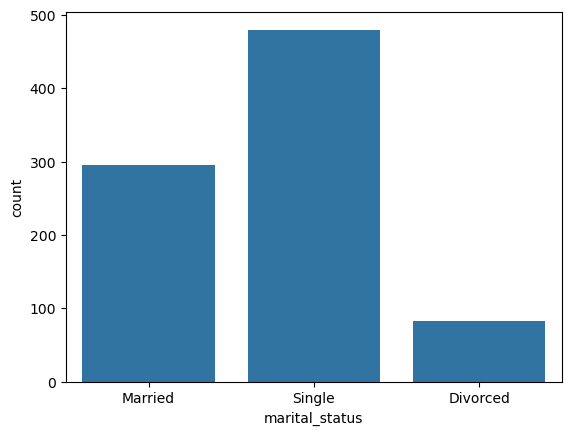

In [39]:
# countplot marital status
sns.countplot(data=df, x='marital_status')

### Bivariate Analysis

#### Categorical - Categorical

Text(0.5, 1.0, 'Income by Education Level')

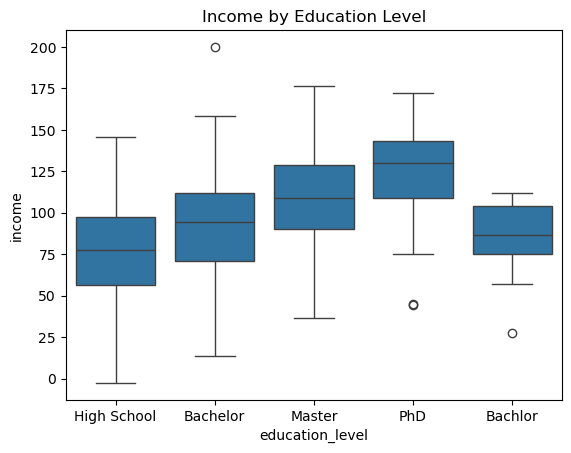

In [47]:
# BOX-PLOT
sns.boxplot(data=df, x='education_level', y='income')
plt.title("Income by Education Level")

Text(0.5, 1.0, 'Income by Job Type')

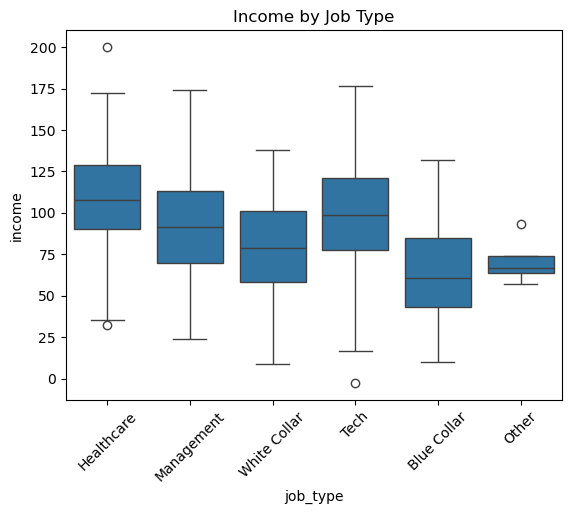

In [48]:
# Boxplot: income by job type
sns.boxplot(x='job_type', y='income', data=df)
plt.xticks(rotation=45)
plt.title("Income by Job Type")

#### Numerical - Numerical

Text(0.5, 1.0, 'Income vs Work Experience')

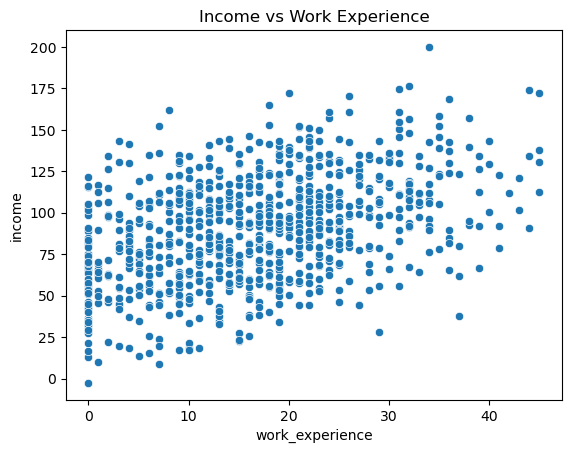

In [49]:
# Scatter plot: work experience vs income
sns.scatterplot(x='work_experience', y='income', data=df)
plt.title("Income vs Work Experience")

Text(0.5, 1.0, 'Correlation Heatmap')

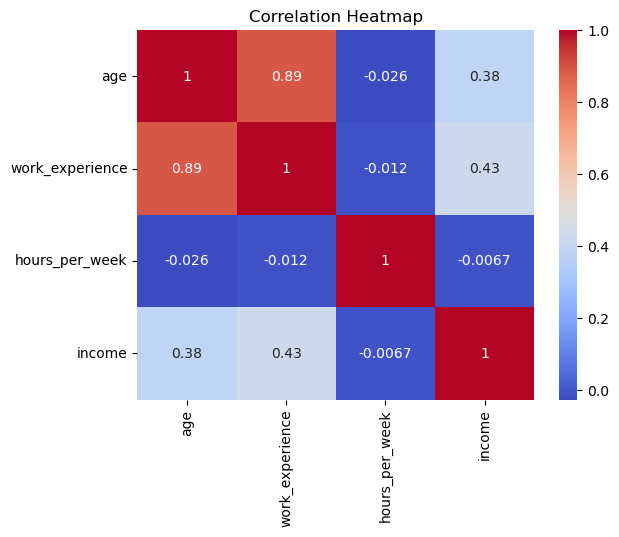

In [50]:
# Correlation heatmap
numeric_cols = ['age', 'work_experience', 'hours_per_week', 'income']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

([<matplotlib.axis.XTick at 0x157af1480>,
 [Text(0, 0, 'Low (0)'), Text(1, 0, 'High (1)')])

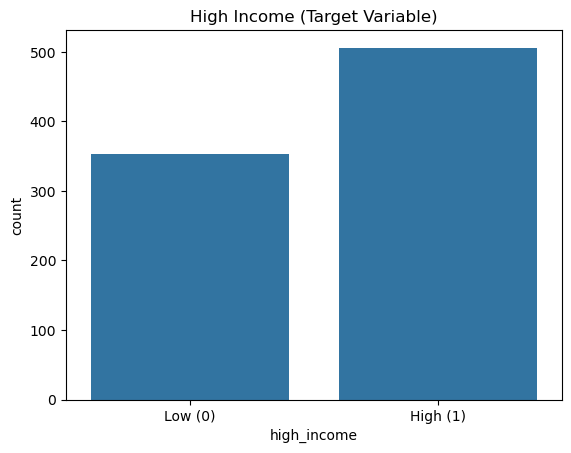

In [51]:
# Count of high vs low income
sns.countplot(x='high_income', data=df)
plt.title("High Income (Target Variable)")
plt.xticks([0,1], ['Low (0)', 'High (1)'])

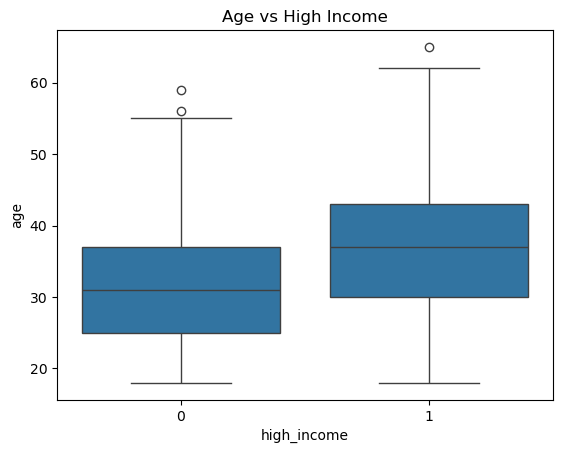

In [52]:
# Compare features by target
sns.boxplot(x='high_income', y='age', data=df)
plt.title("Age vs High Income")
plt.show()

### Outlier Treatment

In [71]:
import numpy as np

def treat_Outliers(data, col, method='remove'):
    """
    Treat outliers in a specified column of a DataFrame.

    Parameters:
    - data: pandas DataFrame
    - col: column name (string) to treat
    - method: 'remove' to drop outliers, 'cap' to cap them within bounds

    Returns:
    - Modified DataFrame
    """
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if method == 'remove':
        data = data[~((data[col] < lower_bound) | (data[col] > upper_bound))]
    elif method == 'cap':
        data[col] = np.clip(data[col], lower_bound, upper_bound)
    else:
        raise ValueError("method must be 'remove' or 'cap'")

    return data


In [72]:
df['high_income'].value_counts(normalize=True)


high_income
1    0.588
0    0.412
Name: proportion, dtype: float64

In [ ]:
# if the distribution is imbalance then we can use SMOTE to balance the classes
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # for tree based models
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(class_weight='balanced')